In [1]:
using DataFrames, CSV
df = DataFrame(whichSNaQ=Int64[], runtime=Float64[], nhybrids=Int64[], best_network=String[], negloglik=Float64[])

Row,whichSNaQ,runtime,nhybrids,best_network,negloglik
,Int64,Float64,Int64,String,Float64


## SNaQ 2 data

In [2]:
snaq2_dir = "/mnt/ws/home/nkolbow/repos/snaq2/empirical-cui/condor/snaq_outputs/"

for nhyb in 0:5
    file_prefix = joinpath(snaq2_dir, "cui_net_$(nhyb)hyb")
    if !isfile("$(file_prefix).out") continue end
    
    best_net_data = readlines("$(file_prefix).log")
    
    best_net = split(best_net_data[length(best_net_data)-1], "MaxNet is ")[2]

    best_negloglik = split(best_net_data[length(best_net_data)], "with -loglik ")[2]
    best_negloglik = parse(Float64, best_negloglik)

    runtime = parse(Float64, readlines(joinpath(snaq2_dir, "$(file_prefix).runtime"))[1])
    push!(df, [2, runtime, nhyb, best_net, best_negloglik])
end


In [3]:
df

Row,whichSNaQ,runtime,nhybrids,best_network,negloglik
,Int64,Float64,Int64,String,Float64
1,2,28878.5,0,"(Xbirchmanni_GARC,Xmalinche_CHIC2,(Xcortezi,(Xmontezumae,((((((Xalvarezi,Xmayae):0.33573261546776034,Xhellerii):0.2570428685455809,Xsignum):1.8684829981806892,(Xclemenciae_F2,Xmonticolus):1.4568562811775525):0.9894123051197872,((((((((Xgordoni,Xmeyeri):0.260941650500119,Xcouchianus):3.5263530419946125,Xvariatus):0.6441174121326382,Xevelynae):0.4623785424025624,Xmilleri):0.2206839165610763,Xxiphidium):0.34187169818975405,Xandersi):0.4130797975090862,Xmaculatus):0.562819643879695):2.2238926599946973,((Xcontinens,Xpygmaeus):1.968647426989417,(Xnigrensis,Xmultilineatus):1.4508222016470356):2.427787188281627):0.4925677072017978):0.690280843537655):0.8942572881883746);",12306.3
2,2,11385.9,3,"((Xmayae,(Xsignum,#H25:1.5110480531329233::0.4327950246782939):4.04058166057681):0.29097932418472794,(Xhellerii,((((((Xmilleri,((Xxiphidium,#H24:0.0025733981072351224::0.1653578762288908):1.4105052944020438,((((Xgordoni,Xmeyeri):0.2670867288636092,Xcouchianus):3.5136450622639113,Xvariatus):0.6447932507803675,Xevelynae):0.4127047464709273):0.29169621821694164):0.4689913906836836,Xandersi):0.6508723073329289,Xmaculatus):1.0204452453357777,((((Xmontezumae,(Xcortezi,((Xmalinche_CHIC2,Xbirchmanni_GARC):1.0856348061486425)#H26:0.0::0.8723944119423989):1.2642136964649866):0.6291264913973904,((Xnigrensis,Xmultilineatus):1.451720793459369,(Xpygmaeus,Xcontinens):1.9559255320014535):2.373363334840846):1.1256981032693505,#H26:8.409270739061494::0.1276055880576011):1.0752369723711777)#H24:0.6351120238201327::0.8346421237711092):0.7893778931636327,(Xclemenciae_F2,Xmonticolus):1.456643524686765):1.7670793573232058)#H25:1.0595886525893456::0.5672049753217061):0.6877953118502366,Xalvarezi);",7045.49
3,2,21882.7,5,"(Xmayae,((Xhellerii,((((((((((((Xgordoni,Xmeyeri):0.2631227031446862,Xcouchianus):3.54021612159992,Xvariatus):0.6437316675570034,Xevelynae):0.4114043093284645,(Xxiphidium,#H24:7.809109621543954e-7::0.1649517615020249):1.4165913479654098):0.2921964918454891,Xmilleri):0.4691622169119663,Xandersi):0.6488320449041185,Xmaculatus):1.018515784980067,((((Xmontezumae,(Xcortezi,((Xmalinche_CHIC2,Xbirchmanni_GARC):1.0849726998175)#H26:0.0010908140230310095::0.8685945336508559):1.2792390904173159):0.6320193209227563,((Xnigrensis,(Xmultilineatus)#H27:::0.8933645769387583):2.1536576339054445,(#H27:::0.10663542306124178,(Xcontinens,Xpygmaeus):1.2578127470041887):0.7723312910403919):2.3389927104259014):1.074742972912891,#H26:8.295425154703283::0.1314054663491441):1.1091321001809857)#H24:0.6580752321658498::0.8350482384979752):0.7606154109054719,(Xmonticolus,(Xclemenciae_F2)#H28:::0.8872061505132185):2.178805456475259):0.6531834063316464,#H28:::0.11279384948678145):1.1802247941509667)#H25:0.6615510973730296::0.5706273914381044):0.6810352768760031,Xalvarezi):0.26007612581046646,(Xsignum,#H25:9.581758012036618::0.4293726085618957):5.979160617223211);",6920.93


## SNaQ 1 data

In [4]:
snaq1_dir = "/mnt/ws/home/nkolbow/repos/snaq2/empirical-cui/snaq1-outputs/"

for nhyb in 0:5
    best_net = ""
    best_negloglik = Inf
    max_runtime = 0.

    for j = 1:10
        file_prefix = joinpath(snaq1_dir, "net$(nhyb)_$(j)")
        if !isfile("$(file_prefix).log") continue end
        
        net_data = readlines("$(file_prefix).log")
        net = split(net_data[length(net_data)-1], "MaxNet is ")[2]

        negloglik = split(net_data[length(net_data)], "with -loglik ")[2]
        negloglik = parse(Float64, negloglik)

        runtime = readlines("$(file_prefix).out")[3]
        runtime = split(runtime, "lapsed time: ")[2]
        runtime = parse(Float64, split(runtime, " seconds")[1])

        max_runtime = max(max_runtime, runtime)
        if negloglik < best_negloglik
            best_negloglik = negloglik
            best_net = net
        end
    end

    push!(df, [1, max_runtime, nhyb, best_net, best_negloglik])
end
df

Row,whichSNaQ,runtime,nhybrids,best_network,negloglik
,Int64,Float64,Int64,String,Float64
1,2,28878.5,0,"(Xbirchmanni_GARC,Xmalinche_CHIC2,(Xcortezi,(Xmontezumae,((((((Xalvarezi,Xmayae):0.33573261546776034,Xhellerii):0.2570428685455809,Xsignum):1.8684829981806892,(Xclemenciae_F2,Xmonticolus):1.4568562811775525):0.9894123051197872,((((((((Xgordoni,Xmeyeri):0.260941650500119,Xcouchianus):3.5263530419946125,Xvariatus):0.6441174121326382,Xevelynae):0.4623785424025624,Xmilleri):0.2206839165610763,Xxiphidium):0.34187169818975405,Xandersi):0.4130797975090862,Xmaculatus):0.562819643879695):2.2238926599946973,((Xcontinens,Xpygmaeus):1.968647426989417,(Xnigrensis,Xmultilineatus):1.4508222016470356):2.427787188281627):0.4925677072017978):0.690280843537655):0.8942572881883746);",12306.3
2,2,11385.9,3,"((Xmayae,(Xsignum,#H25:1.5110480531329233::0.4327950246782939):4.04058166057681):0.29097932418472794,(Xhellerii,((((((Xmilleri,((Xxiphidium,#H24:0.0025733981072351224::0.1653578762288908):1.4105052944020438,((((Xgordoni,Xmeyeri):0.2670867288636092,Xcouchianus):3.5136450622639113,Xvariatus):0.6447932507803675,Xevelynae):0.4127047464709273):0.29169621821694164):0.4689913906836836,Xandersi):0.6508723073329289,Xmaculatus):1.0204452453357777,((((Xmontezumae,(Xcortezi,((Xmalinche_CHIC2,Xbirchmanni_GARC):1.0856348061486425)#H26:0.0::0.8723944119423989):1.2642136964649866):0.6291264913973904,((Xnigrensis,Xmultilineatus):1.451720793459369,(Xpygmaeus,Xcontinens):1.9559255320014535):2.373363334840846):1.1256981032693505,#H26:8.409270739061494::0.1276055880576011):1.0752369723711777)#H24:0.6351120238201327::0.8346421237711092):0.7893778931636327,(Xclemenciae_F2,Xmonticolus):1.456643524686765):1.7670793573232058)#H25:1.0595886525893456::0.5672049753217061):0.6877953118502366,Xalvarezi);",7045.49
3,2,21882.7,5,"(Xmayae,((Xhellerii,((((((((((((Xgordoni,Xmeyeri):0.2631227031446862,Xcouchianus):3.54021612159992,Xvariatus):0.6437316675570034,Xevelynae):0.4114043093284645,(Xxiphidium,#H24:7.809109621543954e-7::0.1649517615020249):1.4165913479654098):0.2921964918454891,Xmilleri):0.4691622169119663,Xandersi):0.6488320449041185,Xmaculatus):1.018515784980067,((((Xmontezumae,(Xcortezi,((Xmalinche_CHIC2,Xbirchmanni_GARC):1.0849726998175)#H26:0.0010908140230310095::0.8685945336508559):1.2792390904173159):0.6320193209227563,((Xnigrensis,(Xmultilineatus)#H27:::0.8933645769387583):2.1536576339054445,(#H27:::0.10663542306124178,(Xcontinens,Xpygmaeus):1.2578127470041887):0.7723312910403919):2.3389927104259014):1.074742972912891,#H26:8.295425154703283::0.1314054663491441):1.1091321001809857)#H24:0.6580752321658498::0.8350482384979752):0.7606154109054719,(Xmonticolus,(Xclemenciae_F2)#H28:::0.8872061505132185):2.178805456475259):0.6531834063316464,#H28:::0.11279384948678145):1.1802247941509667)#H25:0.6615510973730296::0.5706273914381044):0.6810352768760031,Xalvarezi):0.26007612581046646,(Xsignum,#H25:9.581758012036618::0.4293726085618957):5.979160617223211);",6920.93
4,1,62189.9,0,"(Xbirchmanni_GARC,Xmalinche_CHIC2,(Xcortezi,((((Xcontinens,Xpygmaeus):1.9686746399192034,(Xnigrensis,Xmultilineatus):1.4507946075895048):2.4277831703754047,(((((((((Xgordoni,Xmeyeri):0.26096116854800855,Xcouchianus):3.5262740112374034,Xvariatus):0.6441337797254055,Xevelynae):0.46238113045940904,Xmilleri):0.2206796711101763,Xxiphidium):0.34187335598897917,Xandersi):0.4130796436664383,Xmaculatus):0.5628172294686543,((((Xalvarezi,Xmayae):0.33575629100320215,Xhellerii):0.2570030405820556,Xsignum):1.8684905148667412,(Xclemenciae_F2,Xmonticolus):1.4568344768997241):0.989409830282603):2.223889084775516):0.4925710493816971,Xmontezumae):0.6902757536009876):0.8942518687351185);",12306.3
5,1,105512.0,1,"(Xalvarezi,Xmayae,(Xhellerii,(Xsignum,((Xclemenciae_F2,Xmonticolus):1.4552041214707416,(((((((((Xgordoni,Xmeyeri):0.2609873101734162,Xcouchianus):3.528063280805239,Xvariatus):0.6446279089286899,Xevelynae):0.462284368652192,Xmilleri):0.15800582733701732,(Xxiphidium,#H24:::0.17643906087780342):1.119827636629351

In [5]:
CSV.write("/mnt/ws/home/nkolbow/repos/snaq2/empirical-cui/output-data.csv", df)

"/mnt/ws/home/nkolbow/repos/snaq2/empirical-cui/output-data.csv"

In [6]:
df = CSV.read("/mnt/ws/home/nkolbow/repos/snaq2/empirical-cui/output-data.csv", DataFrame)

Row,whichSNaQ,runtime,nhybrids,best_network,negloglik
,Int64,Float64,Int64,String,Float64
1,2,28878.5,0,"(Xbirchmanni_GARC,Xmalinche_CHIC2,(Xcortezi,(Xmontezumae,((((((Xalvarezi,Xmayae):0.33573261546776034,Xhellerii):0.2570428685455809,Xsignum):1.8684829981806892,(Xclemenciae_F2,Xmonticolus):1.4568562811775525):0.9894123051197872,((((((((Xgordoni,Xmeyeri):0.260941650500119,Xcouchianus):3.5263530419946125,Xvariatus):0.6441174121326382,Xevelynae):0.4623785424025624,Xmilleri):0.2206839165610763,Xxiphidium):0.34187169818975405,Xandersi):0.4130797975090862,Xmaculatus):0.562819643879695):2.2238926599946973,((Xcontinens,Xpygmaeus):1.968647426989417,(Xnigrensis,Xmultilineatus):1.4508222016470356):2.427787188281627):0.4925677072017978):0.690280843537655):0.8942572881883746);",12306.3
2,2,11385.9,3,"((Xmayae,(Xsignum,#H25:1.5110480531329233::0.4327950246782939):4.04058166057681):0.29097932418472794,(Xhellerii,((((((Xmilleri,((Xxiphidium,#H24:0.0025733981072351224::0.1653578762288908):1.4105052944020438,((((Xgordoni,Xmeyeri):0.2670867288636092,Xcouchianus):3.5136450622639113,Xvariatus):0.6447932507803675,Xevelynae):0.4127047464709273):0.29169621821694164):0.4689913906836836,Xandersi):0.6508723073329289,Xmaculatus):1.0204452453357777,((((Xmontezumae,(Xcortezi,((Xmalinche_CHIC2,Xbirchmanni_GARC):1.0856348061486425)#H26:0.0::0.8723944119423989):1.2642136964649866):0.6291264913973904,((Xnigrensis,Xmultilineatus):1.451720793459369,(Xpygmaeus,Xcontinens):1.9559255320014535):2.373363334840846):1.1256981032693505,#H26:8.409270739061494::0.1276055880576011):1.0752369723711777)#H24:0.6351120238201327::0.8346421237711092):0.7893778931636327,(Xclemenciae_F2,Xmonticolus):1.456643524686765):1.7670793573232058)#H25:1.0595886525893456::0.5672049753217061):0.6877953118502366,Xalvarezi);",7045.49
3,2,21882.7,5,"(Xmayae,((Xhellerii,((((((((((((Xgordoni,Xmeyeri):0.2631227031446862,Xcouchianus):3.54021612159992,Xvariatus):0.6437316675570034,Xevelynae):0.4114043093284645,(Xxiphidium,#H24:7.809109621543954e-7::0.1649517615020249):1.4165913479654098):0.2921964918454891,Xmilleri):0.4691622169119663,Xandersi):0.6488320449041185,Xmaculatus):1.018515784980067,((((Xmontezumae,(Xcortezi,((Xmalinche_CHIC2,Xbirchmanni_GARC):1.0849726998175)#H26:0.0010908140230310095::0.8685945336508559):1.2792390904173159):0.6320193209227563,((Xnigrensis,(Xmultilineatus)#H27:::0.8933645769387583):2.1536576339054445,(#H27:::0.10663542306124178,(Xcontinens,Xpygmaeus):1.2578127470041887):0.7723312910403919):2.3389927104259014):1.074742972912891,#H26:8.295425154703283::0.1314054663491441):1.1091321001809857)#H24:0.6580752321658498::0.8350482384979752):0.7606154109054719,(Xmonticolus,(Xclemenciae_F2)#H28:::0.8872061505132185):2.178805456475259):0.6531834063316464,#H28:::0.11279384948678145):1.1802247941509667)#H25:0.6615510973730296::0.5706273914381044):0.6810352768760031,Xalvarezi):0.26007612581046646,(Xsignum,#H25:9.581758012036618::0.4293726085618957):5.979160617223211);",6920.93
4,1,62189.9,0,"(Xbirchmanni_GARC,Xmalinche_CHIC2,(Xcortezi,((((Xcontinens,Xpygmaeus):1.9686746399192034,(Xnigrensis,Xmultilineatus):1.4507946075895048):2.4277831703754047,(((((((((Xgordoni,Xmeyeri):0.26096116854800855,Xcouchianus):3.5262740112374034,Xvariatus):0.6441337797254055,Xevelynae):0.46238113045940904,Xmilleri):0.2206796711101763,Xxiphidium):0.34187335598897917,Xandersi):0.4130796436664383,Xmaculatus):0.5628172294686543,((((Xalvarezi,Xmayae):0.33575629100320215,Xhellerii):0.2570030405820556,Xsignum):1.8684905148667412,(Xclemenciae_F2,Xmonticolus):1.4568344768997241):0.989409830282603):2.223889084775516):0.4925710493816971,Xmontezumae):0.6902757536009876):0.8942518687351185);",12306.3
5,1,105512.0,1,"(Xalvarezi,Xmayae,(Xhellerii,(Xsignum,((Xclemenciae_F2,Xmonticolus):1.4552041214707416,(((((((((Xgordoni,Xmeyeri):0.2609873101734162,Xcouchianus):3.528063280805239,Xvariatus):0.6446279089286899,Xevelynae):0.462284368652192,Xmilleri):0.15800582733701732,(Xxiphidium,#H24:::0.17643906087780342):1.119827636629351

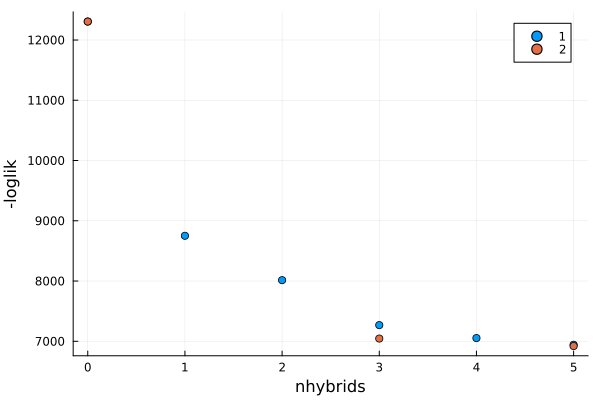

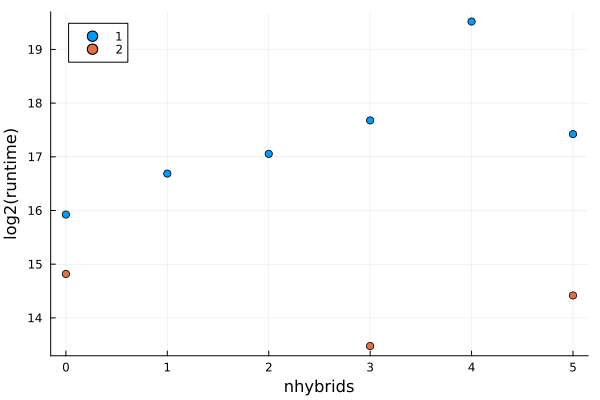

In [9]:
df[:, "log_runtime"] = log2.(df[:, "runtime"])
using Plots

p = scatter(df[:, "nhybrids"], df[:, "negloglik"], color = df[:, "whichSNaQ"], group = df[:, "whichSNaQ"],
    xlabel = "nhybrids", ylabel = "-loglik")
display(p)
p = scatter(df[:, "nhybrids"], df[:, "log_runtime"], color = df[:, "whichSNaQ"], group = df[:, "whichSNaQ"],
xlabel = "nhybrids", ylabel = "log2(runtime)")

In [8]:
df

Row,whichSNaQ,runtime,nhybrids,best_network,negloglik,log_runtime
,Int64,Float64,Int64,String,Float64,Float64
1,2,28878.5,0,"(Xbirchmanni_GARC,Xmalinche_CHIC2,(Xcortezi,(Xmontezumae,((((((Xalvarezi,Xmayae):0.33573261546776034,Xhellerii):0.2570428685455809,Xsignum):1.8684829981806892,(Xclemenciae_F2,Xmonticolus):1.4568562811775525):0.9894123051197872,((((((((Xgordoni,Xmeyeri):0.260941650500119,Xcouchianus):3.5263530419946125,Xvariatus):0.6441174121326382,Xevelynae):0.4623785424025624,Xmilleri):0.2206839165610763,Xxiphidium):0.34187169818975405,Xandersi):0.4130797975090862,Xmaculatus):0.562819643879695):2.2238926599946973,((Xcontinens,Xpygmaeus):1.968647426989417,(Xnigrensis,Xmultilineatus):1.4508222016470356):2.427787188281627):0.4925677072017978):0.690280843537655):0.8942572881883746);",12306.3,14.8177
2,2,11385.9,3,"((Xmayae,(Xsignum,#H25:1.5110480531329233::0.4327950246782939):4.04058166057681):0.29097932418472794,(Xhellerii,((((((Xmilleri,((Xxiphidium,#H24:0.0025733981072351224::0.1653578762288908):1.4105052944020438,((((Xgordoni,Xmeyeri):0.2670867288636092,Xcouchianus):3.5136450622639113,Xvariatus):0.6447932507803675,Xevelynae):0.4127047464709273):0.29169621821694164):0.4689913906836836,Xandersi):0.6508723073329289,Xmaculatus):1.0204452453357777,((((Xmontezumae,(Xcortezi,((Xmalinche_CHIC2,Xbirchmanni_GARC):1.0856348061486425)#H26:0.0::0.8723944119423989):1.2642136964649866):0.6291264913973904,((Xnigrensis,Xmultilineatus):1.451720793459369,(Xpygmaeus,Xcontinens):1.9559255320014535):2.373363334840846):1.1256981032693505,#H26:8.409270739061494::0.1276055880576011):1.0752369723711777)#H24:0.6351120238201327::0.8346421237711092):0.7893778931636327,(Xclemenciae_F2,Xmonticolus):1.456643524686765):1.7670793573232058)#H25:1.0595886525893456::0.5672049753217061):0.6877953118502366,Xalvarezi);",7045.49,13.475
3,2,21882.7,5,"(Xmayae,((Xhellerii,((((((((((((Xgordoni,Xmeyeri):0.2631227031446862,Xcouchianus):3.54021612159992,Xvariatus):0.6437316675570034,Xevelynae):0.4114043093284645,(Xxiphidium,#H24:7.809109621543954e-7::0.1649517615020249):1.4165913479654098):0.2921964918454891,Xmilleri):0.4691622169119663,Xandersi):0.6488320449041185,Xmaculatus):1.018515784980067,((((Xmontezumae,(Xcortezi,((Xmalinche_CHIC2,Xbirchmanni_GARC):1.0849726998175)#H26:0.0010908140230310095::0.8685945336508559):1.2792390904173159):0.6320193209227563,((Xnigrensis,(Xmultilineatus)#H27:::0.8933645769387583):2.1536576339054445,(#H27:::0.10663542306124178,(Xcontinens,Xpygmaeus):1.2578127470041887):0.7723312910403919):2.3389927104259014):1.074742972912891,#H26:8.295425154703283::0.1314054663491441):1.1091321001809857)#H24:0.6580752321658498::0.8350482384979752):0.7606154109054719,(Xmonticolus,(Xclemenciae_F2)#H28:::0.8872061505132185):2.178805456475259):0.6531834063316464,#H28:::0.11279384948678145):1.1802247941509667)#H25:0.6615510973730296::0.5706273914381044):0.6810352768760031,Xalvarezi):0.26007612581046646,(Xsignum,#H25:9.581758012036618::0.4293726085618957):5.979160617223211);",6920.93,14.4175
4,1,62189.9,0,"(Xbirchmanni_GARC,Xmalinche_CHIC2,(Xcortezi,((((Xcontinens,Xpygmaeus):1.9686746399192034,(Xnigrensis,Xmultilineatus):1.4507946075895048):2.4277831703754047,(((((((((Xgordoni,Xmeyeri):0.26096116854800855,Xcouchianus):3.5262740112374034,Xvariatus):0.6441337797254055,Xevelynae):0.46238113045940904,Xmilleri):0.2206796711101763,Xxiphidium):0.34187335598897917,Xandersi):0.4130796436664383,Xmaculatus):0.5628172294686543,((((Xalvarezi,Xmayae):0.33575629100320215,Xhellerii):0.2570030405820556,Xsignum):1.8684905148667412,(Xclemenciae_F2,Xmonticolus):1.4568344768997241):0.989409830282603):2.223889084775516):0.4925710493816971,Xmontezumae):0.6902757536009876):0.8942518687351185);",12306.3,15.9244
5,1,105512.0,1,"(Xalvarezi,Xmayae,(Xhellerii,(Xsignum,((Xclemenciae_F2,Xmonticolus):1.4552041214707416,(((((((((Xgordoni,Xmeyeri):0.2609873101734162,Xcouchianus):3.528063280805239,Xvariatus):0.6446279089286899,Xevelynae):0.462284368652192,Xmilleri):0.15800582733701732,(Xxiph